In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv("cleaned_creditcard_data.csv")
df.head()

,SpendingPattern1,TransactionRisk2,UserBehavior2,SecurityScore,FrequencyFlag2,TransactionRisk1,VendorTypeScore,SpendingPattern2,TransactionVolume,IsFraud
0,-0.551600,1.378155,-0.072781,0.133558,-0.311169,2.536347,0.207971,-0.617801,0.090794,0
1,1.612727,0.448154,0.266151,-0.008983,-0.143772,0.166480,-0.114805,1.065235,-0.166974,0
2,0.624501,0.379780,-1.340163,-0.055353,-0.165946,1.773209,1.109969,0.066084,0.207643,0
3,-0.226487,-0.863291,-0.185226,0.062723,-0.287924,1.792993,-0.684093,0.178228,-0.054952,0
4,-0.822843,0.403034,0.877737,0.219422,-1.119670,1.548718,-0.237033,0.538196,0.753074,0


In [2]:
# Dataset shape and column types
print("Shape of the dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Shape of the dataset: (15000, 10)

Data types:
 SpendingPattern1     float64
TransactionRisk2     float64
UserBehavior2        float64
SecurityScore        float64
FrequencyFlag2       float64
TransactionRisk1     float64
VendorTypeScore      float64
SpendingPattern2     float64
TransactionVolume    float64
IsFraud                int64
dtype: object

Missing values:
 SpendingPattern1     0
TransactionRisk2     0
UserBehavior2        0
SecurityScore        0
FrequencyFlag2       0
TransactionRisk1     0
VendorTypeScore      0
SpendingPattern2     0
TransactionVolume    0
IsFraud              0
dtype: int64


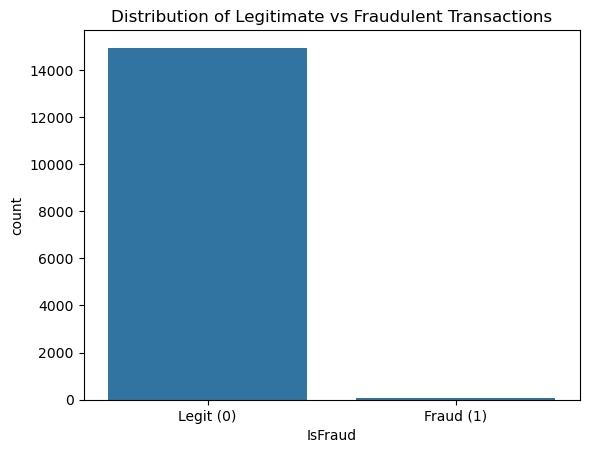

IsFraud
0    14939
1       61
Name: count, dtype: int64

Fraudulent Transaction Percentage: 0.41%


In [3]:
# Class balance
sns.countplot(x='IsFraud', data=df)
plt.title("Distribution of Legitimate vs Fraudulent Transactions")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.show()

# Actual counts
print(df['IsFraud'].value_counts())
print("\nFraudulent Transaction Percentage: {:.2f}%".format(
    df['IsFraud'].mean() * 100))

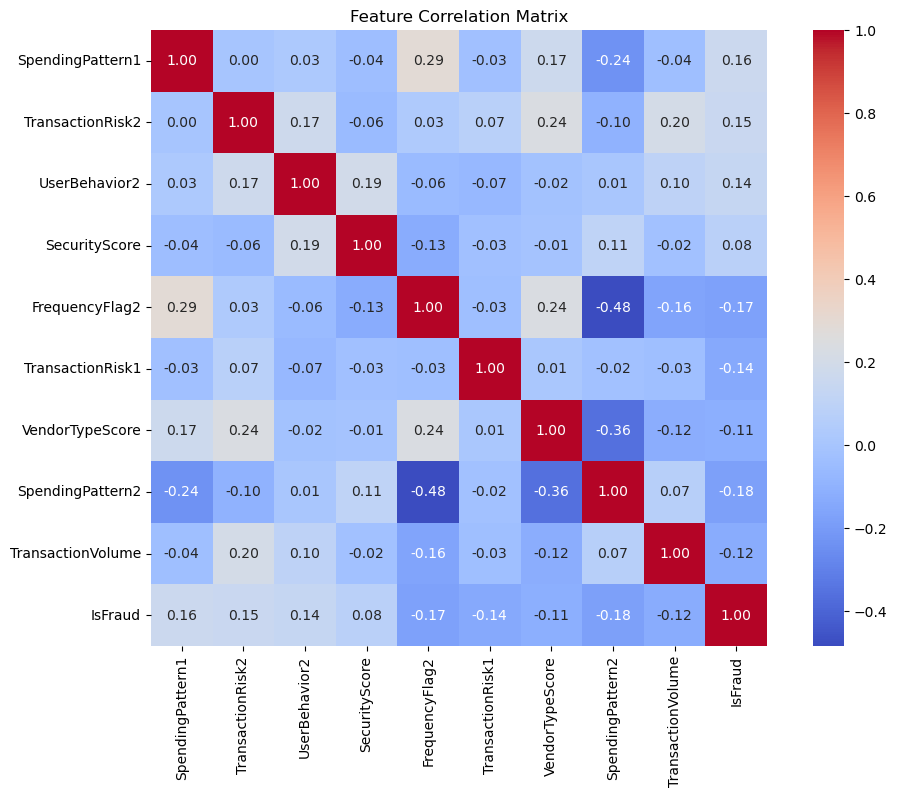

In [4]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

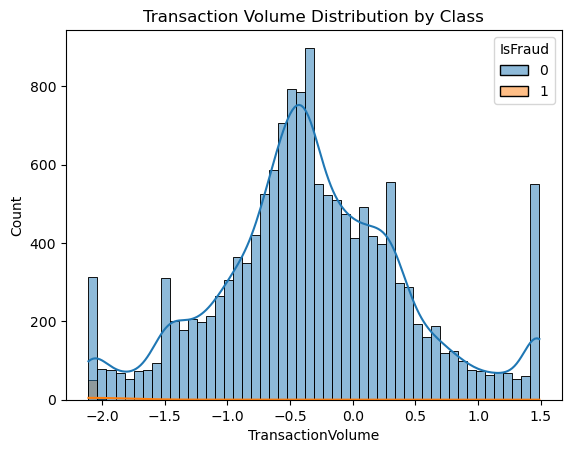

In [5]:
# Example: TransactionVolume distribution
sns.histplot(data=df, x="TransactionVolume", hue="IsFraud", kde=True, bins=50)
plt.title("Transaction Volume Distribution by Class")
plt.show()

In [6]:
# Separate features and target
X = df.drop("IsFraud", axis=1)
y = df["IsFraud"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (12000, 9)
Test shape: (3000, 9)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Using Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train the model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

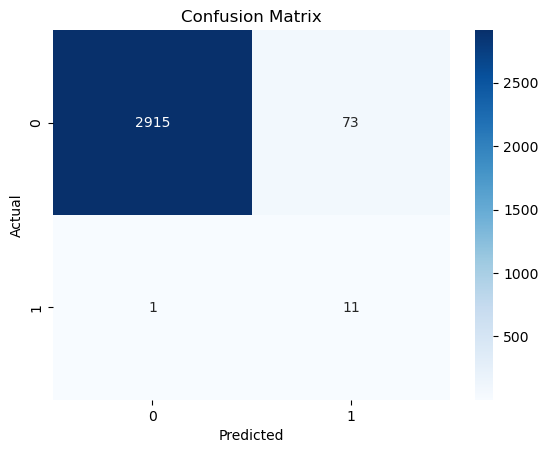

Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9756    0.9875      2988
           1     0.1310    0.9167    0.2292        12

    accuracy                         0.9753      3000
   macro avg     0.5653    0.9461    0.6083      3000
weighted avg     0.9962    0.9753    0.9844      3000

ROC-AUC Score: 0.9915


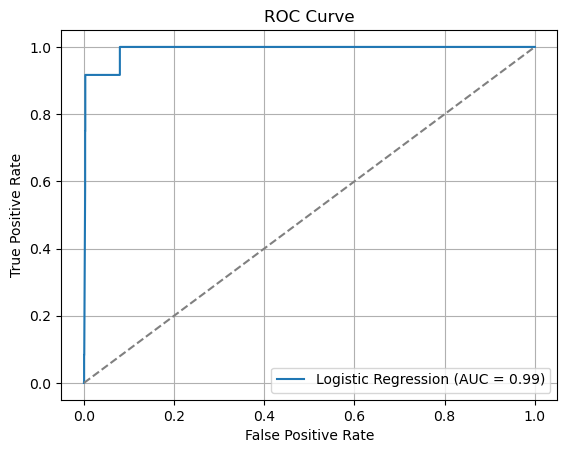

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Good Recall, accuracy and ROC-AUC but Low precision for fraud

## Using Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # handles class imbalance
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test_scaled)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

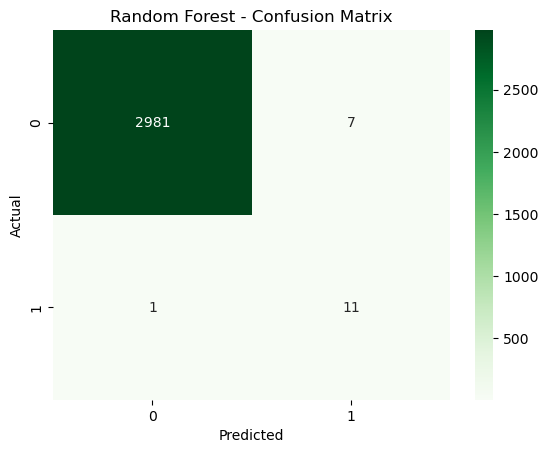

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0     0.9997    0.9977    0.9987      2988
           1     0.6111    0.9167    0.7333        12

    accuracy                         0.9973      3000
   macro avg     0.8054    0.9572    0.8660      3000
weighted avg     0.9981    0.9973    0.9976      3000

ROC-AUC Score (Random Forest): 0.9989


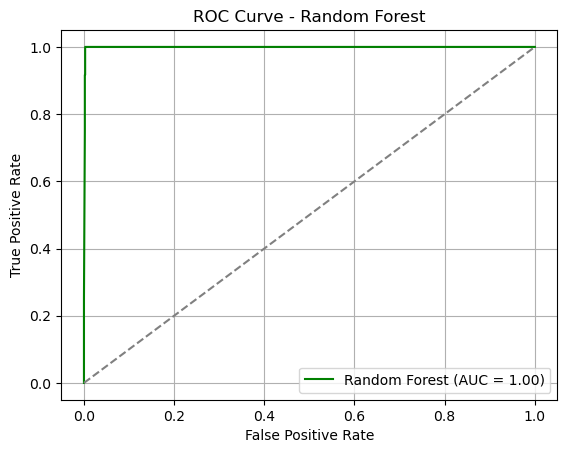

In [13]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf, digits=4))

# ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf:.4f}")

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

Boost in precision without sacrificing recall

## Using XGBoost

In [14]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_clf = XGBClassifier(
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # helps with imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test_scaled)
y_proba_xgb = xgb_clf.predict_proba(X_test_scaled)[:, 1]

/Users/dev/miniforge3/envs/fraud-detect/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [21:14:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


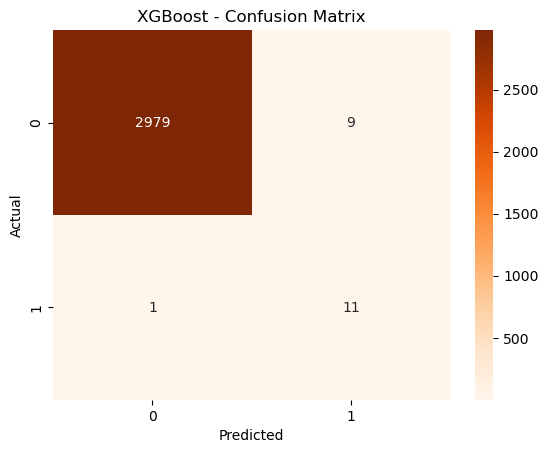

Classification Report (XGBoost):

              precision    recall  f1-score   support

           0     0.9997    0.9970    0.9983      2988
           1     0.5500    0.9167    0.6875        12

    accuracy                         0.9967      3000
   macro avg     0.7748    0.9568    0.8429      3000
weighted avg     0.9979    0.9967    0.9971      3000

ROC-AUC Score (XGBoost): 0.9991


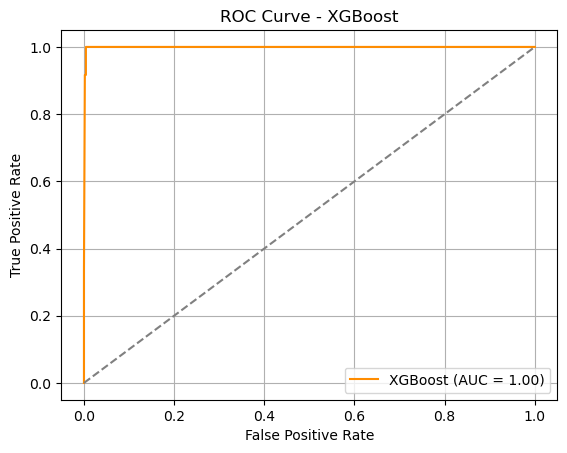

In [15]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb, digits=4))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"ROC-AUC Score (XGBoost): {roc_auc_xgb:.4f}")

# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()

Best Model Recommendation
    
    Random Forest gives the best fraud detection precision and F1-score.
    XGBoost has a slightly higher ROC-AUC, meaning overall probability ranking is slightly better.

Best Balanced Choice: Random Forest
    
    Higher fraud precision
	Same recall
	Still very high ROC-AUC

In [17]:
import joblib

# Save the trained model
joblib.dump(rf_clf, "random_forest_fraud_model.pkl")

# Also save the scaler to process future inputs
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']